In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from engine import Engine
import tccsty

In [21]:
e = Engine()
N = np.array([45300, 55500, 66000, 76500, 88000, 
              97500, 108600, 128200, 149500])
pr = 1+np.array([0.0837, 0.1317, 0.1949, 0.2692, 0.3632,
               0.4750, 0.6220, 0.9858, 1.4685])
F = np.array([4.0325, 6.3421, 9.5303, 13.0636, 17.6728, 
              23.1048, 30.3680, 48.4220, 73.7109])
T8 = 273.15+np.array([609.4910,
595.8417,
582.3185,
549.7798,
549.5277,
517.6733,
502.2233,
488.9522,
511.6950])
omega = 2*np.pi*N/60
r = e.compressor.geom['D2']/2
Mbc = omega*r / np.sqrt(e.compressor.gam*e.R_c*e.T01) 
Mbc_fine = np.linspace(Mbc[0], Mbc[-1], 100)

In [22]:
sol = e.general_explicit_map({'M_flight':0, 'P0_ratio_c': pr[-1]})
params = sol.params
sol

/home/bernardo/Dropbox/tcc/src/mfp2mach.py:39: UserWarning: Exceeded maximum iterations
  warn("Exceeded maximum iterations")


    fjac: array([[-8.65463847e-01,  6.50445425e-03,  1.58237651e-04,
        -2.87782032e-02,  5.82410336e-02, -5.87282911e-03,
        -5.67600618e-02, -4.93230889e-01, -5.23992181e-03,
        -2.71379255e-03, -1.19191847e-02],
       [-3.08886086e-02, -2.40650570e-02, -4.10215954e-01,
        -8.27028823e-03, -4.93859356e-02, -3.16974381e-03,
         4.57759380e-03,  4.48177451e-02, -7.83211211e-01,
         1.10301869e-01,  4.47276576e-01],
       [ 1.40808613e-01, -7.90999248e-03, -1.90176659e-01,
         3.23534685e-02,  8.92542274e-01, -3.55144926e-01,
        -2.27068296e-02, -1.36334817e-01,  1.42845435e-02,
        -9.05643719e-03, -2.73492171e-02],
       [-9.07508670e-02,  1.25946510e-02, -3.73101349e-01,
         3.56332781e-02, -3.75531730e-01, -8.07759214e-01,
         2.39199731e-02,  1.21647063e-01,  1.49088424e-01,
        -3.91629988e-02, -1.36018406e-01],
       [-5.62597779e-03, -1.48669683e-02, -6.13053519e-02,
         5.57877832e-01, -6.78973775e-03,  1.057162

In [23]:
params

{'MFP': 0.4150764076523757,
 'MFP3': 0.2321756357796748,
 'MFP4': 0.25401319343469364,
 'MFP5': 0.30210874429639656,
 'M_flight': 0,
 'Mb_c': 0.9557890017860342,
 'Mb_t': 0.4967516666549996,
 'P0_ratio_c': 2.4684999999999997,
 'P0_ratio_t': 0.7697572065557199,
 'T04': 1150.4013216479686,
 'T0_ratio_c': 1.3122651961559977,
 'T0_ratio_t': 0.9413994612400816,
 'mdotf': 0.00794121817273117}

In [24]:
solutions=[]
e.A8 = np.pi/4*45e-3**2
for Mbc_iter in Mbc_fine:
    sol = e.general_explicit_map({'M_flight':0, 'Mb_c': Mbc_iter},params)
    print(sol.success)
    if sol.success: 
        params = sol.params
        solutions.append(sol.params)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


/home/bernardo/Dropbox/tcc/src/mfp2mach.py:24: RuntimeWarning: invalid value encountered in sqrt
  z_= -np.sqrt(1-MFP/MFP_choked)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [25]:
params

{'MFP': 0.5757087793393364,
 'MFP3': 0.4457583441536049,
 'MFP4': 0.3023607052460322,
 'MFP5': 0.463664935668067,
 'M_flight': 0,
 'Mb_c': 0.862997626463522,
 'Mb_t': 0.7220769961172784,
 'P0_ratio_c': 1.7314679298655649,
 'P0_ratio_t': 0.5775446271606645,
 'T04': 443.8703786578685,
 'T0_ratio_c': 1.2370872237737796,
 'T0_ratio_t': 0.881010897379642,
 'mdotf': 0.0014736786626034842}

In [26]:
for s in solutions: 
    s.update(e.dimensionalize(**s)._asdict())
    s['F'] = e.thrust(**s)

In [27]:
model = pd.DataFrame(solutions)
model

,F,MFP,MFP3,MFP4,MFP5,M_flight,Mb_c,Mb_t,P02,P03,...,T0_ratio_c,T0_ratio_t,T8,mdot2,mdot3,mdot4,mdot5,mdotf,omega_c,omega_t
0,8.007177,0.295153,0.311613,0.214411,0.233966,0,0.458331,0.407242,101000.0,119038.864262,...,1.065738,0.962788,374.316935,0.152690,0.152690,0.153420,0.153420,0.000731,4743.804907,4743.804907
1,8.421215,0.302511,0.317432,0.218298,0.239810,0,0.468980,0.416320,101000.0,119944.054031,...,1.068835,0.961106,374.095215,0.156496,0.156496,0.157245,0.157245,0.000748,4854.025094,4854.025093
2,8.848354,0.309903,0.323159,0.222115,0.245679,0,0.479629,0.425374,101000.0,120875.730727,...,1.072004,0.959392,373.862014,0.160320,0.160320,0.161086,0.161086,0.000766,4964.245280,4964.245280
3,9.288849,0.317327,0.328793,0.225861,0.251573,0,0.490278,0.434404,101000.0,121834.339071,...,1.075246,0.957644,373.616851,0.164161,0.164161,0.164944,0.164944,0.000783,5074.465467,5074.465467
4,9.742959,0.324784,0.334332,0.229534,0.257494,0,0.500928,0.443408,101000.0,122820.340426,...,1.078559,0.955865,373.359234,0.168018,0.168018,0.168819,0.168819,0.000800,5184.685654,5184.685654
5,10.210952,0.332274,0.339775,0.233134,0.263442,0,0.511577,0.452388,101000.0,123834.213108,...,1.081945,0.954053,373.088661,0.171894,0.171894,0.172711,0.172711,0.000818,5294.905840,5294.905840
6,10.693099,0.339799,0.345119,0.236659,0.269416,0,0.522226,0.461341,101000.0,124876.452626,...,1.085404,0.952209,372.804625,0.175786,0.175786,0.176621,0.176621,0.000835,5405.126027,5405.126027
7,11.189674,0.347357,0.350364,0.240109,0.275416,0,0.532875,0.470268,101000.0,125947.571813,...,1.088935,0.950335,372.506615,0.179696,0.179696,0.180548,0.180548,0.000852,5515.346214,5515.346214
8,11.700960,0.354948,0.355507,0.243482,0.281443,0,0.543524,0.479169,101000.0,127048.100826,...,1.092539,0.948428,372.194117,0.183623,0.183623,0.184493,0.184493,0.000869,5625.566401,5625.566400
9,12.227239,0.362574,0.360547,0.246777,0.287496,0,0.554173,0.488043,101000.0,128178.586958,...,1.096217,0.946492,371.866623,0.187568,0.187568,0.188455,0.188455,0.000887,5735.786587,5735.786587


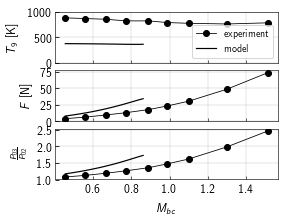

In [35]:
# OBS: falta corrigir os parametros pela pressao ambiente e temperatura
fig, ax = plt.subplots(3,1, sharex=True, figsize=(18/2**0.5/2.54, 18/2.54))
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[2].set_xlabel(r'$M_{bc}$')
ax[2].set_ylabel(r'$\frac{P_{03}}{P_{02}}$')
ax[2].plot(model['Mb_c'], model['P0_ratio_c'],'k', lw=tccsty.thick)
ax[2].plot(Mbc, pr, 'k-o')

ax[1].set_ylabel(r'$F$ [N]')
ax[1].plot(model['Mb_c'], model['F'],'k', lw=tccsty.thick)
ax[1].plot(Mbc, F, 'k-o')

ax[0].set_ylabel(r'$T_9$ [K]')
ax[0].plot(Mbc, T8, 'k-o')
ax[0].plot(model['Mb_c'], model['T8'],'k', lw=tccsty.thick)
ax[0].set_ylim(0,1000)
ax[0].legend(['experiment', 'model'], loc='lower right')

plt.savefig('experimental.pdf')

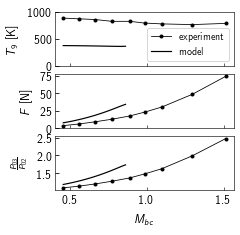

In [45]:
# OBS: falta corrigir os parametros pela pressao ambiente e temperatura
fig, ax = plt.subplots(3,1, sharex=True, figsize=(3.2, 3.2))

ax[2].set_xlabel(r'$M_{bc}$')
ax[2].set_ylabel(r'$\frac{P_{03}}{P_{02}}$')
ax[2].plot(model['Mb_c'], model['P0_ratio_c'],'k', lw=tccsty.thick)
ax[2].plot(Mbc, pr, 'k.-')

ax[1].set_ylabel(r'$F$ [N]')
ax[1].plot(model['Mb_c'], model['F'],'k', lw=tccsty.thick)
ax[1].plot(Mbc, F, 'k.-')

ax[0].set_ylabel(r'$T_9$ [K]')
ax[0].plot(Mbc, T8, 'k.-')
ax[0].plot(model['Mb_c'], model['T8'],'k', lw=tccsty.thick)
ax[0].set_ylim(0,1000)
ax[0].legend(['experiment', 'model'], loc='lower right')

plt.savefig('../fig/experimental_presentation.pdf')

8 14


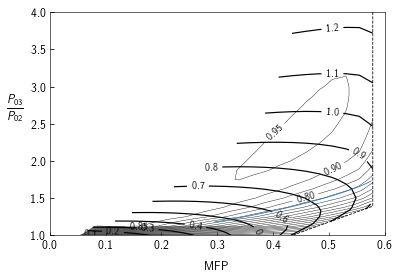

In [10]:
e.compressor.plot_map(plt.gca())
plt.plot(model['MFP'], model['P0_ratio_c'])

In [11]:
model.to_csv('wline45mm.csv')